In [ ]:
# !unzip data.zip -d '/content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/input'

Archive:  data.zip
  inflating: /content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/input/Coronary_artery.csv  
  inflating: /content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/input/data.csv  
  inflating: /content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/input/st_fold_data.csv  


In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier




import os
from IPython.display import display_html
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.gridspec as gridspec
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.gridspec as gridspec

blue_red = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.palplot(sns.color_palette(blue_red))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/input/Coronary_artery.csv')
print(print('Features:{}'.format(df.columns.tolist())))


Features:['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class']
None


In [3]:
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    bool   
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 30.6+ KB


In [5]:
df.describe()


,age,trestbps,chol,thalach,oldpeak,ca,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.946128
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,1.234551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
print(df.shape)
print(df.isnull().values.any())

(297, 14)
False


In [7]:
df2 = pd.read_csv('/content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/input/data.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    float64
 2   sex         303 non-null    float64
 3   cp          303 non-null    float64
 4   trestbps    303 non-null    float64
 5   chol        303 non-null    float64
 6   fbs         303 non-null    float64
 7   restecg     303 non-null    float64
 8   thalach     303 non-null    float64
 9   exang       303 non-null    float64
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    float64
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  class       303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [8]:
df2 = df2[~df2.isin(['?'])]
df2 = df2.dropna(axis=0)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   age         297 non-null    float64
 2   sex         297 non-null    float64
 3   cp          297 non-null    float64
 4   trestbps    297 non-null    float64
 5   chol        297 non-null    float64
 6   fbs         297 non-null    float64
 7   restecg     297 non-null    float64
 8   thalach     297 non-null    float64
 9   exang       297 non-null    float64
 10  oldpeak     297 non-null    float64
 11  slope       297 non-null    float64
 12  ca          297 non-null    object 
 13  thal        297 non-null    object 
 14  class       297 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 37.1+ KB


In [9]:
df2.head()



,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


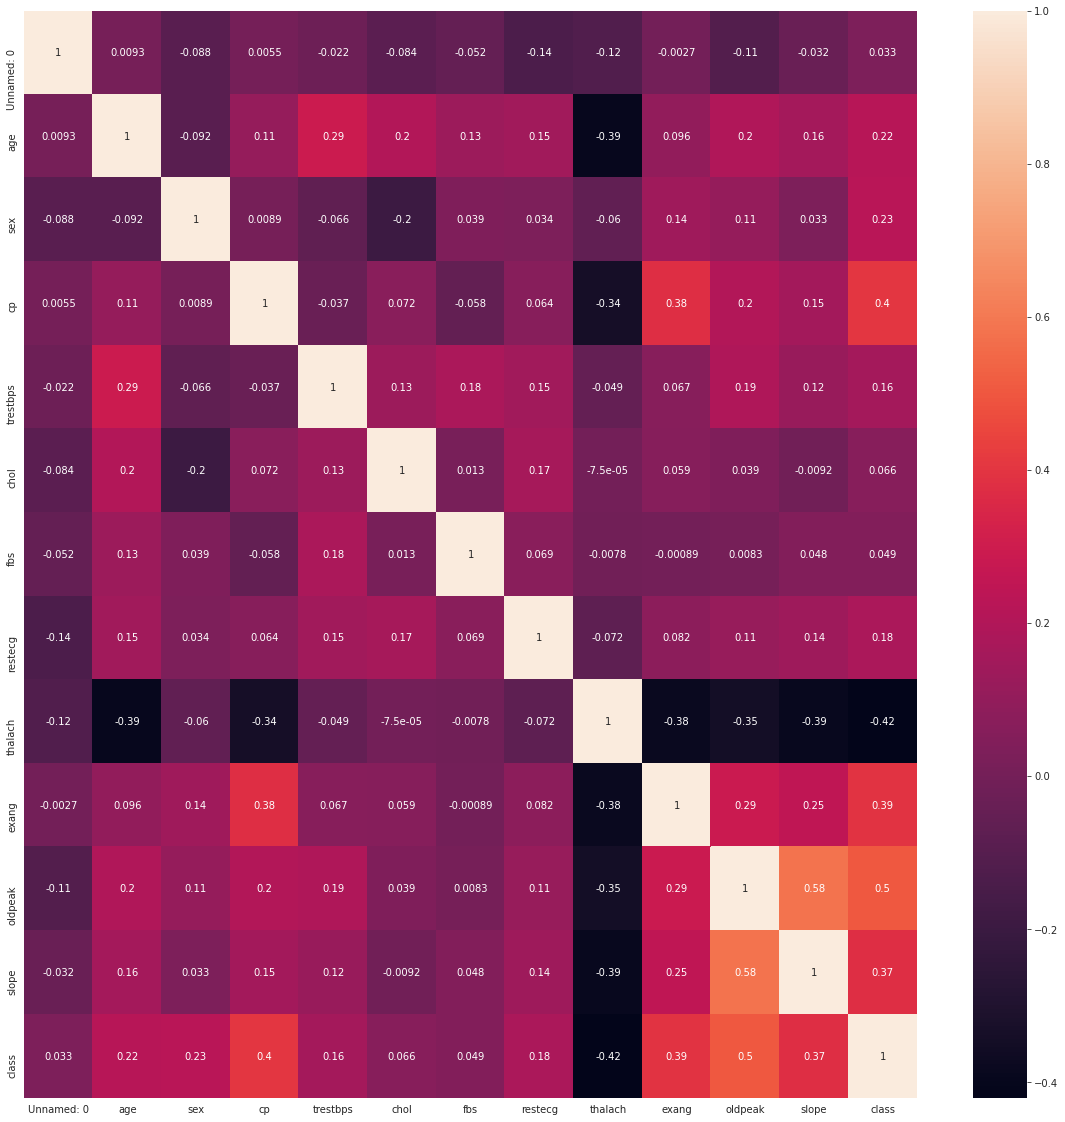

In [10]:
correlation_mat = df2.corr()
plt.figure(figsize=(20,20))
ax=sns.heatmap(correlation_mat, annot = True)
plt.show(ax)


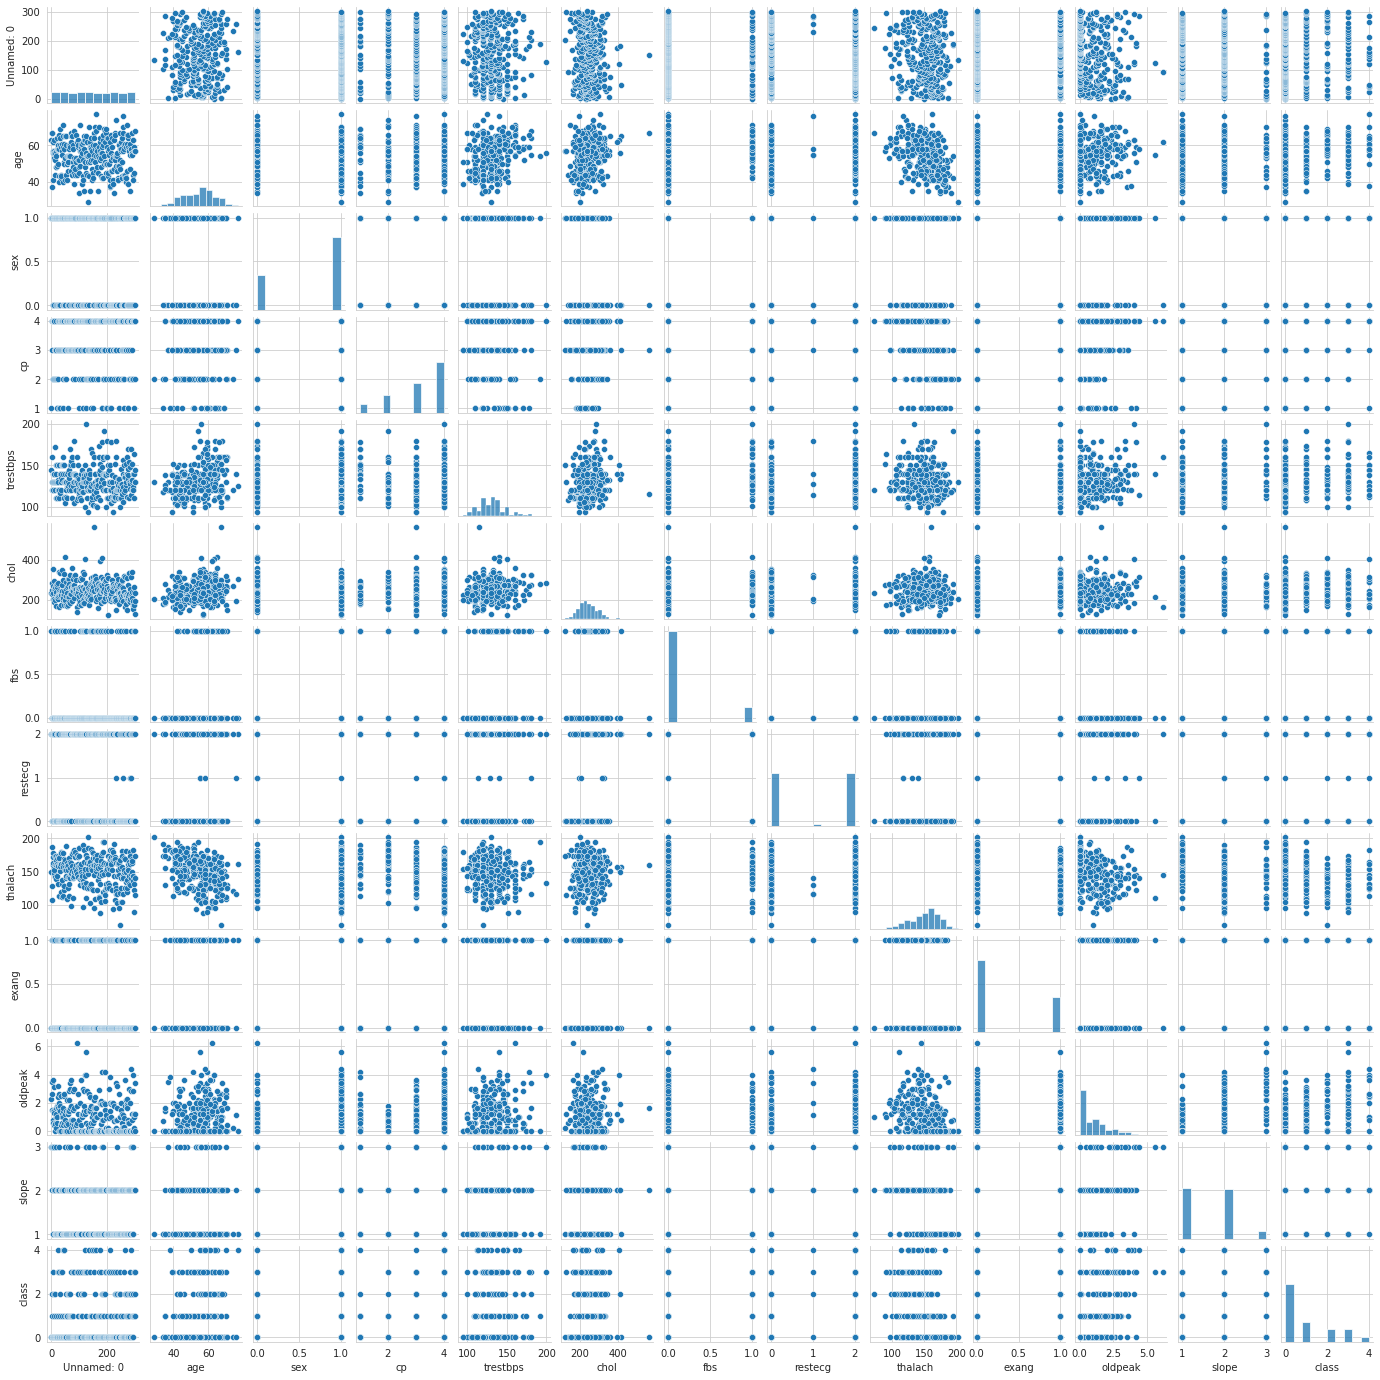

In [11]:
sns.pairplot(df2, height = 1.5, palette = 'rocket')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

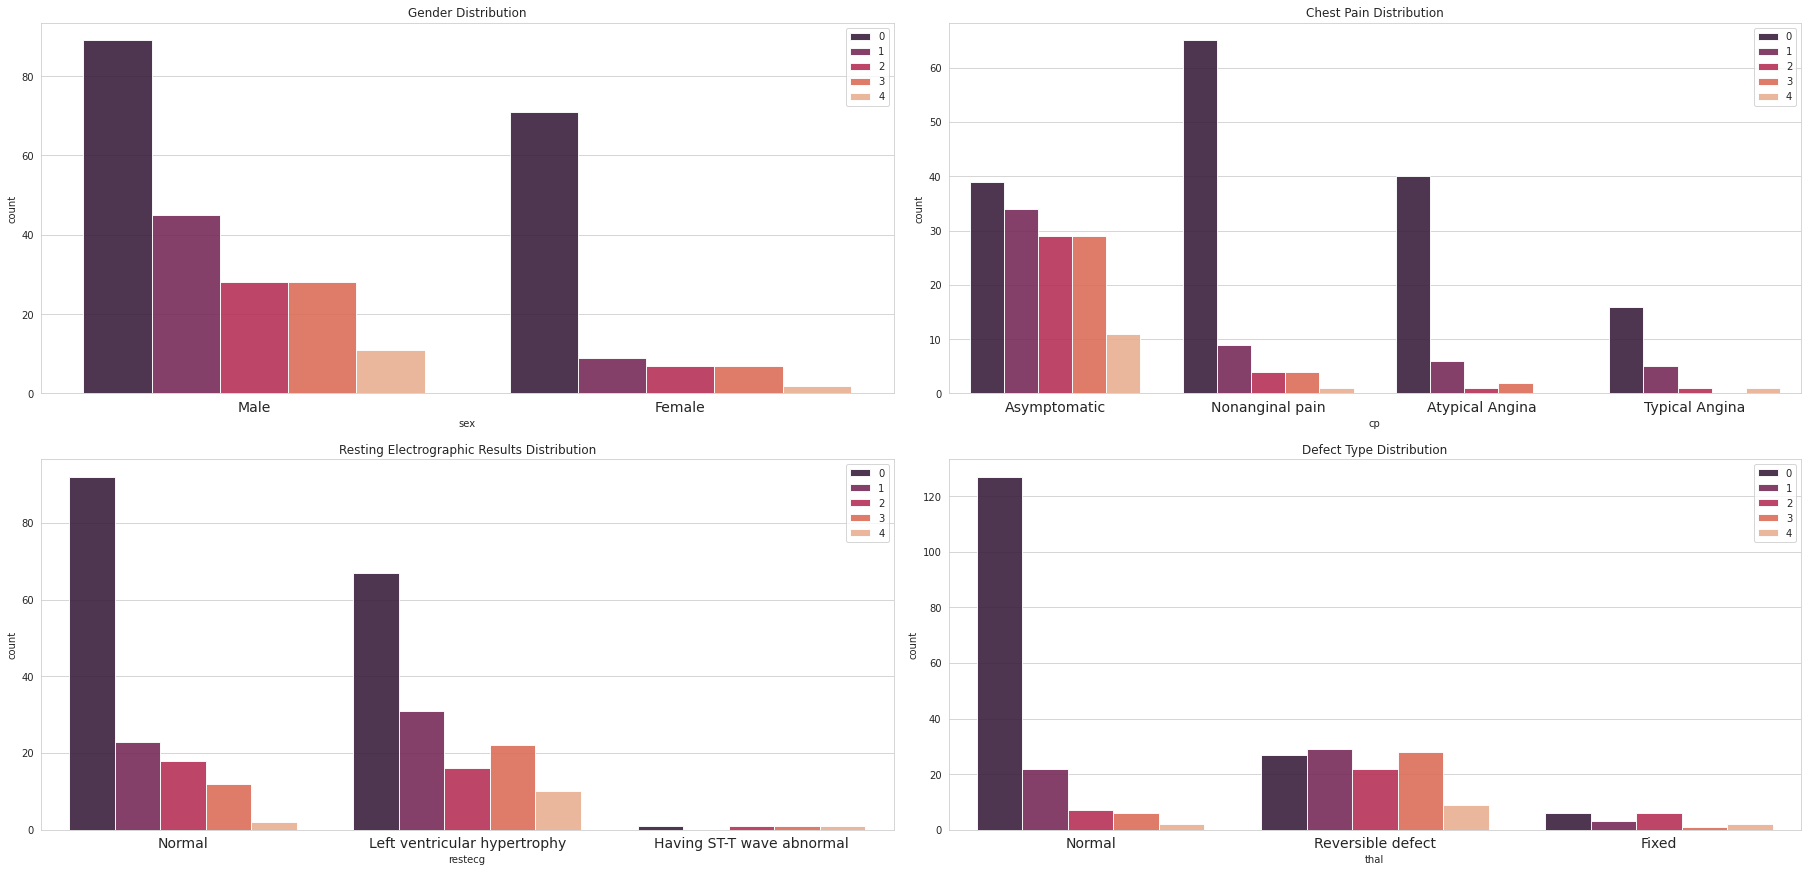

In [12]:
fig = plt.figure(constrained_layout = True, figsize = (25,12))

#create grid

grid = gridspec.GridSpec(ncols = 4, nrows = 2, figure = fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Gender Distribution')


sns.countplot(df['sex'],
             alpha = 0.9,
             hue = df['class'],
             ax = ax1,
             palette = 'rocket',
             order=df['sex'].value_counts().index)

ax1.legend()
plt.xticks(fontsize = 14)

ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('Chest Pain Distribution')
sns.countplot(df['cp'],
             alpha = 0.9,
             hue = df['class'],
             ax = ax2, 
             palette = 'rocket',
             order=df['cp'].value_counts().index)
ax2.legend()
plt.xticks( fontsize = 14)

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Resting Electrographic Results Distribution')
sns.countplot(df['restecg'],
             alpha = 0.9,
             hue = df['class'],
             ax = ax3, 
             palette = 'rocket',
             order=df['restecg'].value_counts().index)
ax3.legend()
plt.xticks(fontsize = 14)

ax4 = fig.add_subplot(grid[1, 2:])
ax4.set_title('Defect Type Distribution')
sns.countplot(df['thal'],
             alpha = 0.9,
             hue = df['class'],
             ax = ax4, 
             palette = 'rocket',
             order=df['thal'].value_counts().index)
ax4.legend()
plt.xticks(fontsize = 14)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Maximum Heart Rate Distribution')

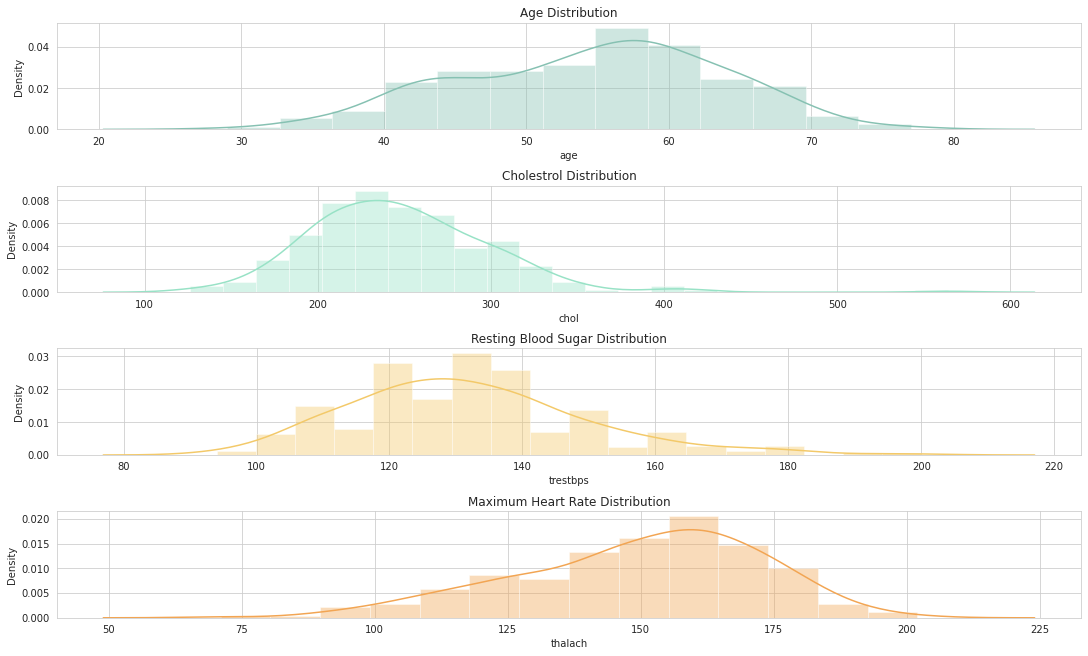

In [13]:
fig = plt.figure(constrained_layout = True, figsize = (15,9))

#create grid

grid = gridspec.GridSpec(ncols = 1, nrows = 4, figure = fig)
ax1 = fig.add_subplot(grid[0, :])

sns.distplot(df.age, ax = ax1, color = blue_red[1])
ax1.set_title('Age Distribution')

ax2 = fig.add_subplot(grid[1, :])
sns.distplot(df.chol, ax = ax2, color = blue_red[2])
ax2.set_title('Cholestrol Distribution')


ax3 = fig.add_subplot(grid[2, :])
sns.distplot(df.trestbps, ax = ax3, color = blue_red[3])
ax3.set_title('Resting Blood Sugar Distribution')

ax4 = fig.add_subplot(grid[3, :])
sns.distplot(df.thalach, ax = ax4, color = blue_red[4])
ax4.set_title('Maximum Heart Rate Distribution')


In [14]:
print(df2.sex.unique())
print(df2.cp.unique())
print(df2.fbs.unique())
print(df2.restecg.unique())
print(df2.exang.unique())
print(df2.slope.unique())
print(df2.ca.unique())
print(df2.thal.unique())


[1. 0.]
[1. 4. 3. 2.]
[1. 0.]
[2. 0. 1.]
[0. 1.]
[3. 2. 1.]
['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


In [15]:
df_new = df2.rename(columns={'class': 'label'})
formula = 'label ~ age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal'
result = smf.glm(formula = formula, data=df_new).fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                  297
Model:                            GLM   Df Residuals:                      280
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.68740
Method:                          IRLS   Log-Likelihood:                -357.01
Date:                Sat, 20 Mar 2021   Deviance:                       192.47
Time:                        15:03:23   Pearson chi2:                     192.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1939      0.772     -0.251      

In [16]:
df_new = df2.rename(columns={'class': 'label'})
formula = 'label ~ age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal'
result = smf.glm(formula = formula, data=df_new).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                  297
Model:                            GLM   Df Residuals:                      280
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.68740
Method:                          IRLS   Log-Likelihood:                -357.01
Date:                Sat, 20 Mar 2021   Deviance:                       192.47
Time:                        15:03:24   Pearson chi2:                     192.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1939      0.772     -0.251      

In [17]:
X = df_new[['cp', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']]
Y = df_new['label']
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])
X.head()

,thalach,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,150.0,2.3,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,108.0,1.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
2,129.0,2.6,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,187.0,3.5,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
4,172.0,1.4,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
y_pred=clf.predict(X_test)


In [21]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


LightGBM Model accuracy score: 0.5833


In [22]:
y_pred_train = clf.predict(X_train)


In [23]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9156


In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))


Training set score: 0.9156
Test set score: 0.5833


In [25]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[32  2  2  0  0]
 [ 3  2  3  1  0]
 [ 2  1  1  1  0]
 [ 0  4  2  0  1]
 [ 0  1  0  2  0]]

True Positives(TP) =  32

True Negatives(TN) =  2

False Positives(FP) =  2

False Negatives(FN) =  3


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.20      0.22      0.21         9
           2       0.12      0.20      0.15         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.24      0.26      0.25        60
weighted avg       0.56      0.58      0.57        60



In [27]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[31  5  0  0  0]
 [ 3  2  2  0  2]
 [ 1  1  2  1  0]
 [ 0  1  4  1  1]
 [ 0  2  0  1  0]]


Accuracy of Logistic Regression: 60.0 

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.18      0.22      0.20         9
           2       0.25      0.40      0.31         5
           3       0.33      0.14      0.20         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.33      0.33      0.32        60
weighted avg       0.62      0.60      0.60        60



In [28]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[ 1 20  1  8  6]
 [ 0  0  0  1  8]
 [ 0  0  1  1  3]
 [ 0  0  0  0  7]
 [ 0  1  0  1  1]]


Accuracy of Naive Bayes model: 5.0 

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.00      0.00      0.00         9
           2       0.50      0.20      0.29         5
           3       0.00      0.00      0.00         7
           4       0.04      0.33      0.07         3

    accuracy                           0.05        60
   macro avg       0.31      0.11      0.08        60
weighted avg       0.64      0.05      0.06        60



In [29]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[36  0  0  0  0]
 [ 6  1  1  1  0]
 [ 1  1  1  2  0]
 [ 2  1  3  1  0]
 [ 1  1  0  1  0]]


Accuracy of Random Forest: 65.0 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        36
           1       0.25      0.11      0.15         9
           2       0.20      0.20      0.20         5
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.29      0.29      0.28        60
weighted avg       0.55      0.65      0.59        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[36  0  0  0  0]
 [ 8  1  0  0  0]
 [ 4  0  1  0  0]
 [ 4  1  2  0  0]
 [ 2  0  0  1  0]]


Accuracy of Extreme Gradient Boost: 63.33333333333333 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        36
           1       0.50      0.11      0.18         9
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.30      0.26      0.25        60
weighted avg       0.50      0.63      0.53        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[35  1  0  0  0]
 [ 6  0  1  1  1]
 [ 2  1  0  2  0]
 [ 1  1  3  2  0]
 [ 1  1  1  0  0]]


Accuracy of K-NeighborsClassifier: 61.66666666666667 

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.40      0.29      0.33         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.24      0.25      0.24        60
weighted avg       0.51      0.62      0.56        60



In [32]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[33  1  2  0  0]
 [ 2  1  4  2  0]
 [ 1  0  2  2  0]
 [ 1  0  5  0  1]
 [ 0  0  3  0  0]]


Accuracy of DecisionTreeClassifier: 60.0 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.50      0.11      0.18         9
           2       0.12      0.40      0.19         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.30      0.29      0.26        60
weighted avg       0.62      0.60      0.59        60



In [33]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[34  2  0  0  0]
 [ 2  3  4  0  0]
 [ 1  1  1  2  0]
 [ 0  1  3  3  0]
 [ 1  1  0  1  0]]


Accuracy of Support Vector Classifier: 68.33333333333333 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.38      0.33      0.35         9
           2       0.12      0.20      0.15         5
           3       0.50      0.43      0.46         7
           4       0.00      0.00      0.00         3

    accuracy                           0.68        60
   macro avg       0.38      0.38      0.38        60
weighted avg       0.66      0.68      0.67        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,60.000000
1,Naive Bayes,5.000000
2,Random Forest,65.000000
3,Extreme Gradient Boost,63.333333
4,K-Nearest Neighbour,61.666667
5,Decision Tree,60.000000
6,Support Vector Machine,68.333333


In [36]:
import pickle

# Save scaler
filename = 'scaler.bin'
pickle.dump(scaler, open(filename, 'wb'))

# Save model
filename = 'coronary-artery-68.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
import pickle

def predict(path_to_model, path_to_scaler, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    X1 = np.array([[Age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio]])
    X2 = np.array([[Gender]])
    model = pickle.load(open(path_to_model, 'rb'))
    scaler = pickle.load(open(path_to_scaler, 'rb'))
    X1 = scaler.transform(X1)
    print(X1)
    X = np.hstack((X1, X2))
    result = model.predict(X)
    return result

path_to_model = '/content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/model/coronary-artery-68.pkl'
path_to_scaler = '/content/drive/Shareddrives/Python Scientists/Islam/Coronary Artery/scaler/scaler.bin'
predict(path_to_model, path_to_scaler, 63,	'Male',	'Typical Angina',	145,	233,	True,	'Left ventricular hypertrophy',	150,	'No',	2.3,	'Downsloping',0,'Fixed')
# predict(path_to_model, path_to_scaler, 65,		0.7,	0.1,	187,	16,	18,	6.8,	3.3,	0.90, 1)

# 63	Male	Typical Angina	145	233	True	Left ventricular hypertrophy	150	No	2.3	Downsloping	0	Fixed	0
# 67	Male	Asymptomatic	160	286	False	Left ventricular hypertrophy	108	Yes	1.5	Flat	3	Normal	2
# 67	Male	Asymptomatic	120	229	False	Left ventricular hypertrophy	129	Yes	2.6	Flat	2	Reversible defect	1

In [37]:
import pickle

def predict(path_to_model, path_to_scaler, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    X = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    model = pickle.load(open(path_to_model, 'rb'))
    scaler = pickle.load(open(path_to_scaler, 'rb'))
    X_scaled = scaler.transform(X)
    result = model.predict(X_scaled)
    return result

path_to_model = '/content/drive/Shareddrives/Python Scientists/Islam/Heart Disease/model/heart-disease-95.pkl'
path_to_scaler = '/content/drive/Shareddrives/Python Scientists/Islam/Heart Disease/scaler/scaler.bin'
# predict(path_to_model, path_to_scaler, 52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3)
predict(path_to_model, path_to_scaler, 71,	0,	0,	112,	149,	0,	1,	125,	0,	1.6,	1,	0,	2)